# Trabajo práctica n°1
Se realizará un EDA sobre el csv de properati, para preparar los datos para realizar luego un modelo de predicción de precios.
El Dataset se encuentra en: https://drive.google.com/file/d/0BzVrTKc02N8qNUdDSExBQlFTNlU/view?resourcekey=0-4m-28Uq6kWRDBrt2NXFbNQ

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos y primera visualización

In [2]:
# Agregar el archivo en la carpeta Data. Ya agregué en el .gitignore que no suba al repositorio nada de la carpeta esa.
location = 'Data/properati.csv'
data = pd.read_csv(location, index_col=0)

In [3]:
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


### Hago un info() para ver cantidad de valores faltantes, los tipos de datos y las columnas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

In [5]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


## value_counts() de las columnas

In [6]:
# Ejemplo de una descripción, para plantear futuros regex 
data['description'][0]

'2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [7]:
data['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

In [8]:
# Tipos de propiedades
data['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [9]:
data['state_name'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [10]:
# Cantidad de barrios
len(data.place_name.unique())

1061

In [11]:
data.geonames_id.value_counts()

3838574.0    8504
3860259.0    6606
3430863.0    6534
3430234.0    3279
3436077.0    2992
             ... 
3839107.0       1
3863890.0       1
3838859.0       1
3864851.0       1
3860197.0       1
Name: geonames_id, Length: 646, dtype: int64

In [12]:
data.floor.value_counts()

1.0      2080
2.0      1542
3.0       914
4.0       658
5.0       484
         ... 
124.0       1
691.0       1
205.0       1
302.0       1
30.0        1
Name: floor, Length: 182, dtype: int64

Primeras conclusiones y dudas:
- Sólo incluyen ventas.
- geonames_id corresponde al place_name (barrio?)?
- floor, no sabemos a que corresponde, puede ser cantidad de pisos, o en que piso se ubica
- Hay un par de currencies que no tienen sentido, ver
- 4 tipos de propiedades, considerar al analizar las demás columnas

**Primeras impresiones de Alan:**  
- Algunos datos no pueden ser correctos (por ej el máx en lat y el mínimo en precio). Revisar datos incoherentes con los demás
- Ver correlación entre columnas, para ver si puede descartarse alguna rápidamente o unificar dos.
- Unificar un poco el tema de la moneda. Ideas:
    - Crear una columna de conversión pesos/dólares se pueda observar mejor la relación. Considerar después la correlación con la fecha capaz?
    - Definir si el precio que se quiere predecir es en dólares o en pesos
    - Analizar la columna precio. Esta es la crítica, ya que define en qué moneda se vende, pero creo que no sirve al tener dos escalas diferentes dentro (separar en dos o considerar las otras dos "aprox"?).  
    - *Duda:* En el modelo, reconocería los dos rangos al tener los dos valores posibles en la columna moneda? 
- Muchos datos faltantes, hay que decidir qué hacer. Ideas:
    - Ver de eliminarlos (faltan 3 datos de place_name) o los que le faltan precio/m2 y no se pueden calcular directo desde las otras columnas (si estimamos esto, estaríamos prediciendo por encima del modelo posterior y me parece que es erróneo)
    - Calcular desde otras columnas, como las equivalencias entre precios o quizás lat-lon considerando place_name
    - Considerar un valor único (por ej, expensas y piso serían 0 y 1 probablemente en los datos faltantes)
    - Usar la columna descripción o título para sacar los datos (por ej cantidad de dormitorios). regex?

**Puntos a considerar, sacados de la reunión:**
- Si es Casa o pH sería 0 de expensas. Sino, se puede estimar desde la descripción capaz?  

## Misceláneos

In [13]:
# Chequeo de los datos que tienen 5 como floor, para analizar que significa
data[data['floor'] == 5]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
83,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.954876705,-60.6518377614",-32.954877,-60.651838,...,55.0,NaN,NaN,5.0,2.0,NaN,http://www.properati.com.ar/15byz_venta_depart...,IDEAL INVERSORES o ESTUDIANTES APTA CREDITO An...,2 Dormitorios. Dorrego y Pellegrini,https://thumbs4.properati.com/5/6EjItxfpThdt-D...
502,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,NaN,NaN,...,270.0,2781.250000,3296.296296,5.0,NaN,NaN,http://www.properati.com.ar/15f0o_venta_depart...,Departamento 320m² con Cochera en Arenales 180...,Departamento 320m² con Dependencias en Arenale...,https://thumbs4.properati.com/5/IOt00YuutmxTA2...
766,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,NaN,NaN,...,105.0,2666.666667,2666.666667,5.0,4.0,NaN,http://www.properati.com.ar/15fxq_venta_depart...,"- EDIFICIO INTELIGENTE- Pisos Exclusivos, - Ha...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/6/Z8rC9UUg4satiU...
868,sell,apartment,Saavedra,|Argentina|Capital Federal|Saavedra|,Argentina,Capital Federal,3429422.0,"-34.555898,-58.479251",-34.555898,-58.479251,...,41.0,NaN,2390.243902,5.0,2.0,NaN,http://www.properati.com.ar/15g9e_venta_depart...,Corredor Responsable: Raul Hector Merlo - CUCI...,MONOAMBIENTE BALCON APTO PROFESIONAL CON RENTA,https://thumbs4.properati.com/1/BSDYOGE3-BPZpq...
4752,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.431903,-58.585582",-34.431903,-58.585582,...,75.0,NaN,2133.333333,5.0,3.0,NaN,http://www.properati.com.ar/15nq4_venta_depart...,Corredor Responsable: Rene Alejandro Vera - CS...,TORRE JAI 3 AMB 2 baños con cochera,https://thumbs4.properati.com/4/SrHn7IoivQuYAg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119625,sell,apartment,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.518567,-58.474571",-34.518567,-58.474571,...,58.0,NaN,2756.896552,5.0,2.0,NaN,http://www.properati.com.ar/1cgx3_venta_depart...,Corredor Responsable: Luis Varela - CSI 5527 /...,OPORTUNIDAD 2 AMBIENTES A ESTRENAR - EDIFICIO ...,https://thumbs4.properati.com/6/8BQJzwL2OP3vy-...
119654,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6031,-58.401046",-34.603100,-58.401046,...,36.0,NaN,1527.777778,5.0,2.0,NaN,http://www.properati.com.ar/1cgyb_venta_depart...,Corredor Responsable: Luis Roman Garcia - C.U....,Venta 2 ambientes amplio buen estado luminoso,https://thumbs4.properati.com/7/QY4RjJpJOS8KB9...
119785,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.554184,-58.436424",-34.554184,-58.436424,...,40.0,NaN,4250.000000,5.0,1.0,NaN,http://www.properati.com.ar/1ch34_venta_depart...,Corredor Responsable: OSCAR N. LIBERMAN - CUCI...,Imperdible Monoambiente en La Pampa y Castañeda,https://thumbs4.properati.com/4/siiS87KRd-EOjk...
119824,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6003087,-58.4044663",-34.600309,-58.404466,...,107.0,2336.448598,2336.448598,5.0,NaN,7000.0,http://www.properati.com.ar/1ch5q_venta_depart...,OPERACION: VENTA TIPO DE PROPIEDAD: DEPARTAMEN...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/4/c7f13kJ_3FlCsA...


In [14]:
#Chequeo de los pH que pisos tienen (se puede cambiar el último loc para ver los otros tres tipos de propiedad). 'apartment', 'house', 'store'
data.groupby(['property_type'])['floor'].value_counts().loc['PH']

floor
1.0     154
2.0     146
3.0      63
6.0      42
5.0      38
4.0      31
7.0      31
8.0      12
9.0      11
11.0     10
10.0      9
12.0      8
13.0      7
14.0      7
16.0      2
15.0      1
17.0      1
Name: floor, dtype: int64

## Chequeo de filas duplicadas
Sólo chequee que sean duplicadas completas, no por ejemplo un análisis más profundo para ver si se repite la misma casa

In [15]:
data.duplicated().sum()

0

## Correlación
Gráfico rápido de correlación del dataset original

<AxesSubplot:>

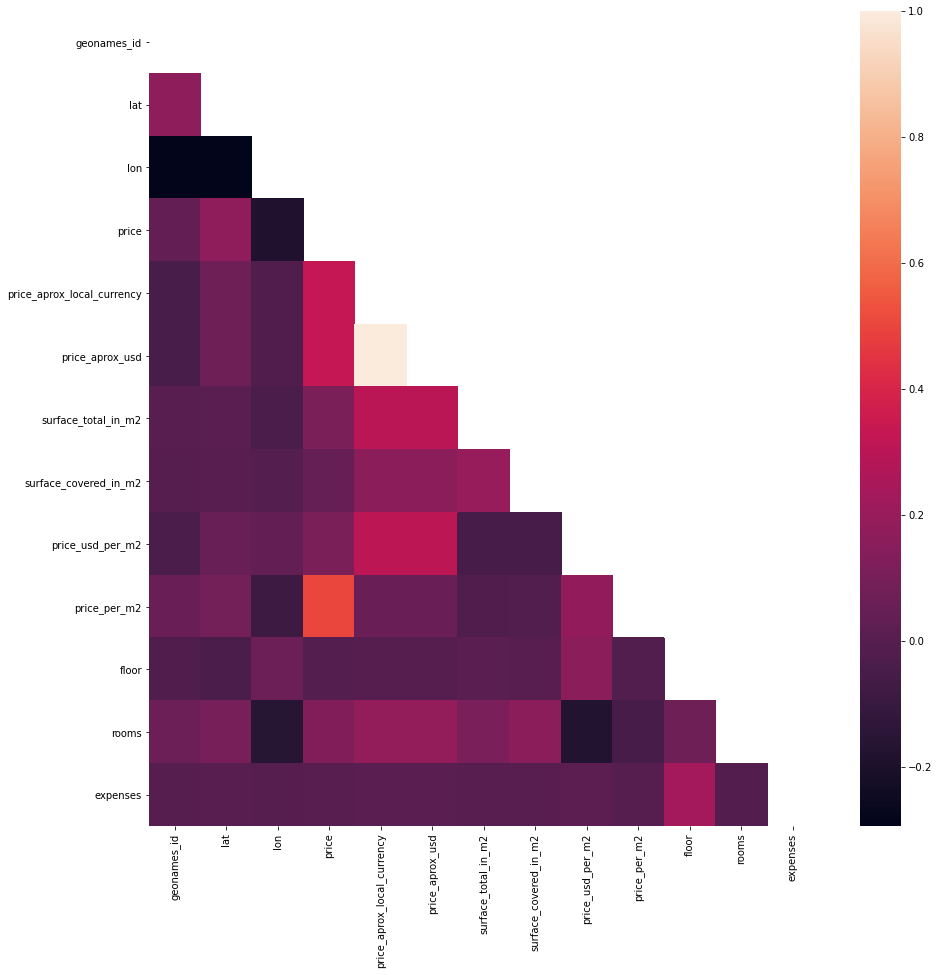

In [16]:
plt.figure(figsize=(15,15))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr , mask=mask)

---
---
## Análisis de las features de precios
### Chequeo de tipos de currency

In [17]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

#### Análisis:  
- Casi todas las operaciones son en pesos o dólares. 
- Se observan 3 operaciones en otras monedas. PEN = soles peruanos y UYU = Pesos uruguayos.  
- Chequeamos estos tres datos únicos para ver su válidez y si pueden convertirse correctamente a dólares

In [18]:
data[(data['currency'] == 'PEN') | (data['currency'] == 'UYU')][['place_with_parent_names','geonames_id','price','currency','price_aprox_local_currency',\
                                                                 'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]

,place_with_parent_names,geonames_id,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
50387,|Argentina|Capital Federal|,3433955.0,380000.0,PEN,2.066865e+06,117139.33,NaN,NaN,NaN,NaN
50388,|Argentina|Capital Federal|,3433955.0,950000.0,PEN,5.167162e+06,292848.33,NaN,NaN,NaN,NaN
107390,|Argentina|Mendoza|San Roque|,3836586.0,650000000.0,UYU,4.054773e+08,22980378.29,NaN,NaN,NaN,NaN


In [19]:
# Veo las descripciones de estos tres datos para ver si me aportan información
print('Descripción de id 50387:\n ', data.loc[50387,'description'])
print('')
print('Descripción de id 50388:\n ', data.loc[50388,'description'])
print('')
print('Descripción de id 107390:\n ', data.loc[107390,'description'])

Descripción de id 50387:
  Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a entregarse en 20 meses de 47m2, pequeño patio. Con todos los artefactos.- Departamento de 1 dormitorios con patio, cochera y parrilla ENTREGA: $380.000 + 24 cuotas de $24.000 ( ) Departamento de 1 dormitorio con patio, sin cochera ENTREGA: $350.000 + 24 cuotas de $22.000 (  ) (  ) Cuotas ajustadas al Indice de la Construcción.-  

Descripción de id 50388:
  Ref.: 56Duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u Hay 3 departamentos en venta, todos con cocina, termotanque y calefactores. 

Descripción de id 107390:
  Casa con Calefacción central, Mendoza, San Roque, por $ 650.000.000


#### Conclusiones:  
- En los dos con soles peruanos se podría imputar el área, y la conversión a dólares es la misma (apox 3.24PER = 1USD en vez de 3.84PER = 1USD que dice google).
- Index 50387 y 50388, usar las otras dos columnas para cambiar el valor de la columna 'precio'. Considerar que 50387 es un plan con cuotas!
- **Index 107390, descartar la fila**, no hay datos para confirmar y el valor es extremadamente alto.

---
### Análisis de valores faltantes de precios

Chequeamos si los valores faltantes son los mismos en todas las features, o se mezclan 

In [53]:
price_na = data[data['price'].isna()][['place_with_parent_names','geonames_id','price','currency','price_aprox_local_currency',\
                                        'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]
print('Cantidad de valores faltantes en columna price: ', data['price'].isna().sum())
print('Valores faltantes currency en dataset de precios faltantes', price_na['currency'].isna().sum())
print('Valores faltantes price_aprox_local_currency en dataset de precios faltantes', price_na['price_aprox_local_currency'].isna().sum())
print('Valores faltantes price_aprox_usd en dataset de precios faltantes', price_na['price_aprox_usd'].isna().sum())
print('Valores faltantes price_usd_per_m2 en dataset de precios faltantes', price_na['price_usd_per_m2'].isna().sum())
print('Valores faltantes price_per_m2 en dataset de precios faltantes', price_na['price_per_m2'].isna().sum())

Cantidad de valores faltantes en columna price:  20410
Valores faltantes currency en dataset de precios faltantes 20410
Valores faltantes price_aprox_local_currency en dataset de precios faltantes 20410
Valores faltantes price_aprox_usd en dataset de precios faltantes 20410
Valores faltantes price_usd_per_m2 en dataset de precios faltantes 20410
Valores faltantes price_per_m2 en dataset de precios faltantes 20410


#### Conclusiones:
- Los datos faltantes la columna 'price' son los mismos en todas las demás columnas relacionadas al precio.

---
### Distribución y outliers

In [80]:
# En estos dataset no estaría incluyendo los NaN, imputar antes de separar
data_precios = data[['price','currency','price_aprox_local_currency','price_aprox_usd']]
precios_ars = data_precios[data['currency'] == 'ARS']
precios_usd = data_precios[data['currency'] == 'USD']

In [37]:
# Función útil para mostrar Dataframes uno al lado del otro
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0" # Esto es un espacio en Latin1 (no-break space in a program/&nbsp)
    display(HTML(output))

In [81]:
display_side_by_side([precios_ars.describe(),precios_usd.describe()],['Pesos Argentinos','Dólares'])

,price,price_aprox_local_currency,price_aprox_usd
count,13219.000000,13219.000000,13219.000000
mean,1798580.327181,1782589.159340,101028.035041
std,1972031.140989,1975418.573247,111956.619525
min,80000.000000,82340.170000,4666.620000
25%,1047270.000000,1036840.045000,58762.790000
50%,1419000.000000,1405187.150000,79638.820000
75%,1983201.000000,1966007.705000,111423.260000
max,99999999.000000,98956842.470000,5608367.620000
,price,price_aprox_local_currency,price_aprox_usd
count,87587.000000,87587.000000,87587.000000


In [24]:
# Compruebo si todos los valores de operaciones en dolares son los mismos en ambas columnas
precios_usd[precios_usd['price'] != precios_usd['price_aprox_usd']]['price'].sum()

0.0

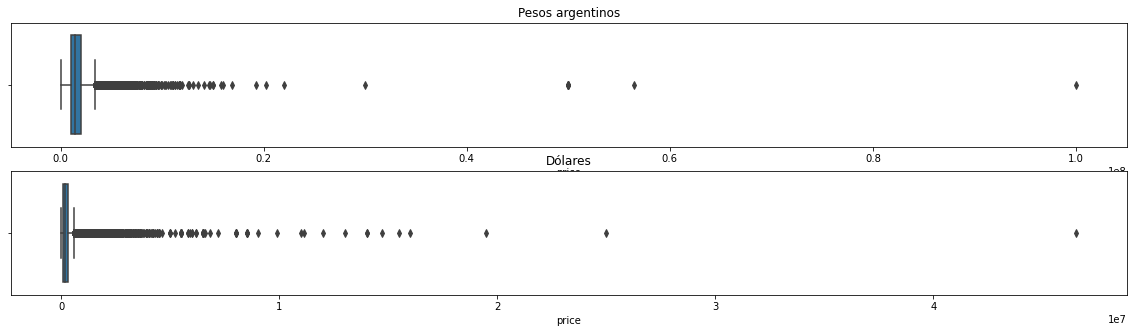

In [56]:
# Boxplot de datos completos
fig, axs = plt.subplots(2,1,figsize=(20,5))
bp_ars = sns.boxplot(x='price', data=precios_ars, ax=axs[0])
bp_usd = sns.boxplot(x='price', data=precios_usd, ax=axs[1])
bp_ars.set_title('Pesos argentinos')
bp_usd.set_title('Dólares')
plt.show()

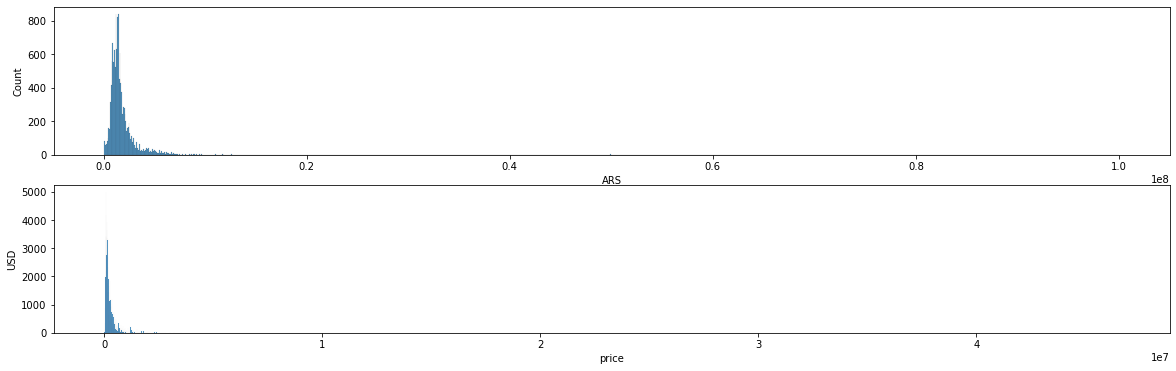

In [55]:
# histogramas de datos completos
fig, axs = plt.subplots(2,1,figsize=(20,6))
sns.histplot(data=precios_ars, x='price', ax=axs[0])
sns.histplot(data=precios_usd, x='price', ax=axs[1])
axs[0].set_xlabel('ARS')
axs[1].set_ylabel('USD')
plt.show()

#### Análisis:  
- Ambos dataset:
    - Tienen algunos valores demasiado altos comparados al resto, hacer análisis específicos de los mismos
    - Los boxplots consideran muchos valores como outliers, analizar esta situación, porque pueden ser válidos, o necesitarse separarse en dos categorías
    - Rehacer los histogramas eliminando los valores extremos, para poder observar bien la distribución
    - El valor del mínimo no es el mismo que el del dataset original. hipótesis: el dato faltante extra de 'currency'
    - En el gráfico de correlación general se observa que las dos features de precios aproximados están muy correlacionadas, hacer la columna de precio de conversión y ver en qué valores se meneja.
- Pesos argentinos:
    - Las features de 'price' y 'price_aprox_local_currency' no son iguales, buscar patrón de por qué pasa esto
    - El máximo precio resalta, será un valor máximo permitido de la app en vez de un valor real?.

- Dólares:
    - Mismos valores en columna de 'price' y 'price_aprox_usd'

In [52]:
# Compruebo el dato faltante extra de currency con respecto a las columnas de precios
data[(~data['price'].isna())&(data['currency'].isna())][['price','currency','price_aprox_local_currency',\
                                                                 'price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','description','title']]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,description,title
9761,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR


#### Conclusión:
- El index 9761 se debería eliminar, ya que tiene valores erróneos (ceros) y ningún dato desde donde sacarlo.

### Creción de feature "cuotas"
Se detectan las descripciones que incluyen la palabra cuotas en la descripción. Esto indicaría que el precio indicado es parte de un plan de cuotas, y no el completo. 


In [115]:
# regex de detección de cuotas en la descripción, para generar nuevo Feature
import re

pattern_cuota = '.*cuota.*'
re_cuota = re.compile(pattern_cuota)
match_cuota = data['description'].apply(lambda x: np.NaN if x is np.NaN else re_cuota.match(x))\
                                 .isna()

data_precios.loc[:,'cuotas'] = match_cuota
print('Cantidad de registros que incluyen la palabra "cuotas": ',len(match_cuota) - match_cuota.sum())

data_precios

Cantidad de registros que incluyen la palabra "cuotas":  7198


,price,currency,price_aprox_local_currency,price_aprox_usd,cuotas
0,62000.0,USD,1093959.00,62000.0,True
1,150000.0,USD,2646675.00,150000.0,True
2,72000.0,USD,1270404.00,72000.0,True
3,95000.0,USD,1676227.50,95000.0,True
4,64000.0,USD,1129248.00,64000.0,True
...,...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0,True
121216,498000.0,USD,8786961.00,498000.0,True
121217,131500.0,USD,2320251.75,131500.0,True
121218,95900.0,USD,1692107.55,95900.0,True
